# **AKhalaji**

Importing libaries

In [2]:
import qiskit as qs
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit,transpile,assemble
from qiskit_aer import AerSimulator

In [16]:
n = 3

Making the oracel

In [7]:
def bernstien_vazirani_oracle(s,n):
    qc = QuantumCircuit(n+1)
    s_rev = ''.join(reversed(s))
    for q in range(n):
        if s_rev[q] == '1':
            qc.cx(q,n)
    gate = qc.to_gate()
    gate.name = "Oracle"
    return gate

In [8]:
bernstien_vazirani_oracle('011',3)

Instruction(name='Oracle', num_qubits=4, num_clbits=0, params=[])

Making the circuit

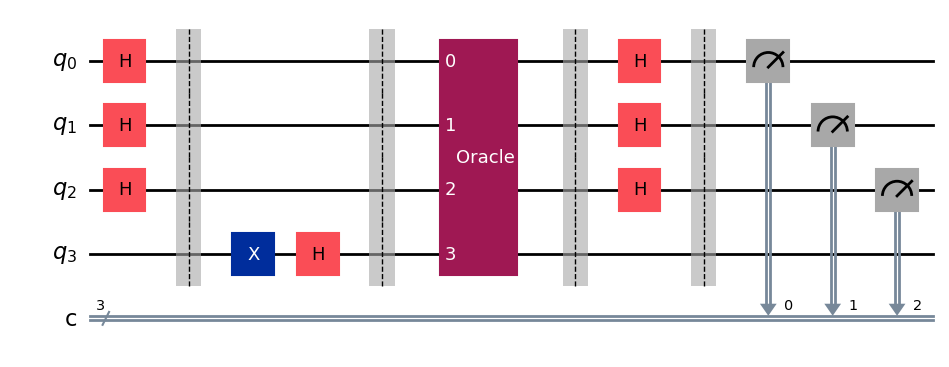

In [13]:
qc = QuantumCircuit(n+1,n)
for q in range(n):
    qc.h(q)
qc.barrier()
qc.x(n)
qc.h(n)
qc.barrier()
qc.append(bernstien_vazirani_oracle('011',3),[0,1,2,3])
qc.barrier()
for q in range(n):
    qc.h(q)
qc.barrier()
for q in range(n):
    qc.measure(q,q)
qc.draw('mpl')

Running the circuit

In [14]:
backend = AerSimulator()
transpiled_circuit = transpile(qc, backend)
qjob = backend.run(transpiled_circuit, shots=2048)
result = qjob.result()
counts = result.get_counts()


Plotting the result

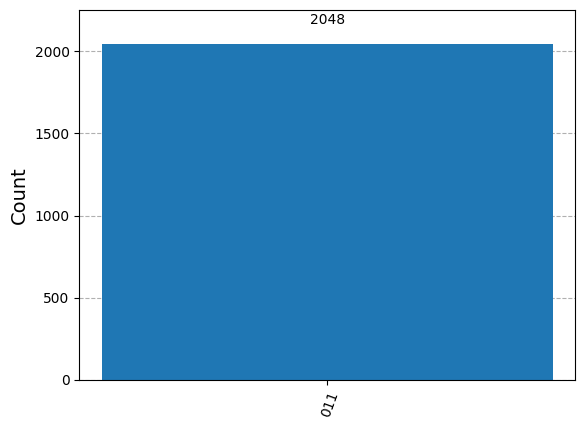

In [15]:
plot_histogram(counts)